* Histogram
* Outliers
* Box Plot
* Summary Statistics
* CDF
* Effect size
* Relationship Between Variable
* Correlation
* Covariance
* Pearson Correlation
* Spearman's Rank Correlation
* Mean vs Median
* Hypothesis Testing
* Normal(Guassian) Distribution and z-score

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

data = data.drop(['Unnamed: 32', 'id'], axis=1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
data.head()
data.shape
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Histogram
* How many times each value appears in dataset. This description is called the distribution of variable.
* Most common way to represent distribution of variable is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears.
* EX: [1, 1, 1, 1, 2, 2, 2]. 

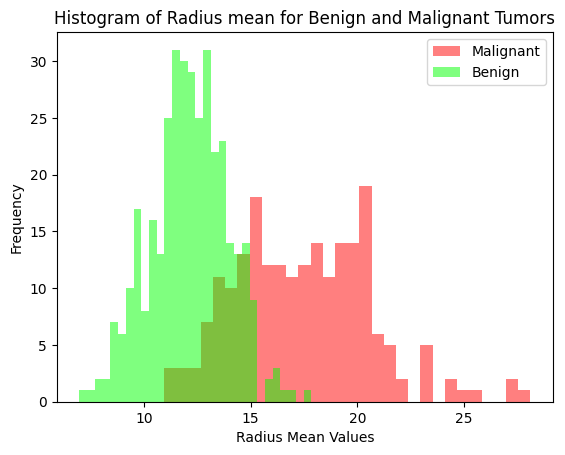

Most frequent malignant radius mean: 20.101999999999997


In [3]:
import matplotlib.pyplot as plt

m = plt.hist(data[data['diagnosis'] == 'M'].radius_mean, bins=30, fc = (1, 0, 0, 0.5), label='Malignant')
b = plt.hist(data[data['diagnosis'] == 'B'].radius_mean, bins=30, fc = (0, 1, 0, 0.5), label='Benign')

plt.legend()
plt.xlabel('Radius Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Radius mean for Benign and Malignant Tumors')
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print(f"Most frequent malignant radius mean: {most_frequent_malignant_radius_mean}")

* Lets look at other conclusions
* From this graph you can see that raduis mean of malignant tumors are bigger than raduis mean of benign tumors mostly.
* The benign distribution (green in graph) is approcimately bell-shape that is shape of normal distribution (guassian distribution)
* Also you can find reult like that most frequent malignant raduis mean is 

## Outliers

* While looking histogram as you can see there are rare values in benign distribution (green in graph)
* There values can be errors or rare events.
* There errors and rare events can be called outliers.
* Calcuulating outliers:
    * first we need to calculate first quartile (Q1)(25%)
    * then find IQR(Inter Quartile Range) = Q3 - Q1
    * finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
    * Anything outside this range is an outlier
    * lets write the code for benign tumor distribution for feature radius mean

In [8]:
data_benign = data[data['diagnosis'] == 'B']
data_malignant = data[data['diagnosis'] == 'M']
desc = data_benign.radius_mean.describe()

Q1 = desc['25%']
Q2 = desc['50%']
Q3 = desc['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Anything outside this range is an outlier: (", lower_bound, ",", upper_bound, ")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers: ", data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)
desc

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

## Box Plot
* You can see outliers also from box plots
* We found 3 outlier in benign radius mean and in box plot there are 3 outlier.

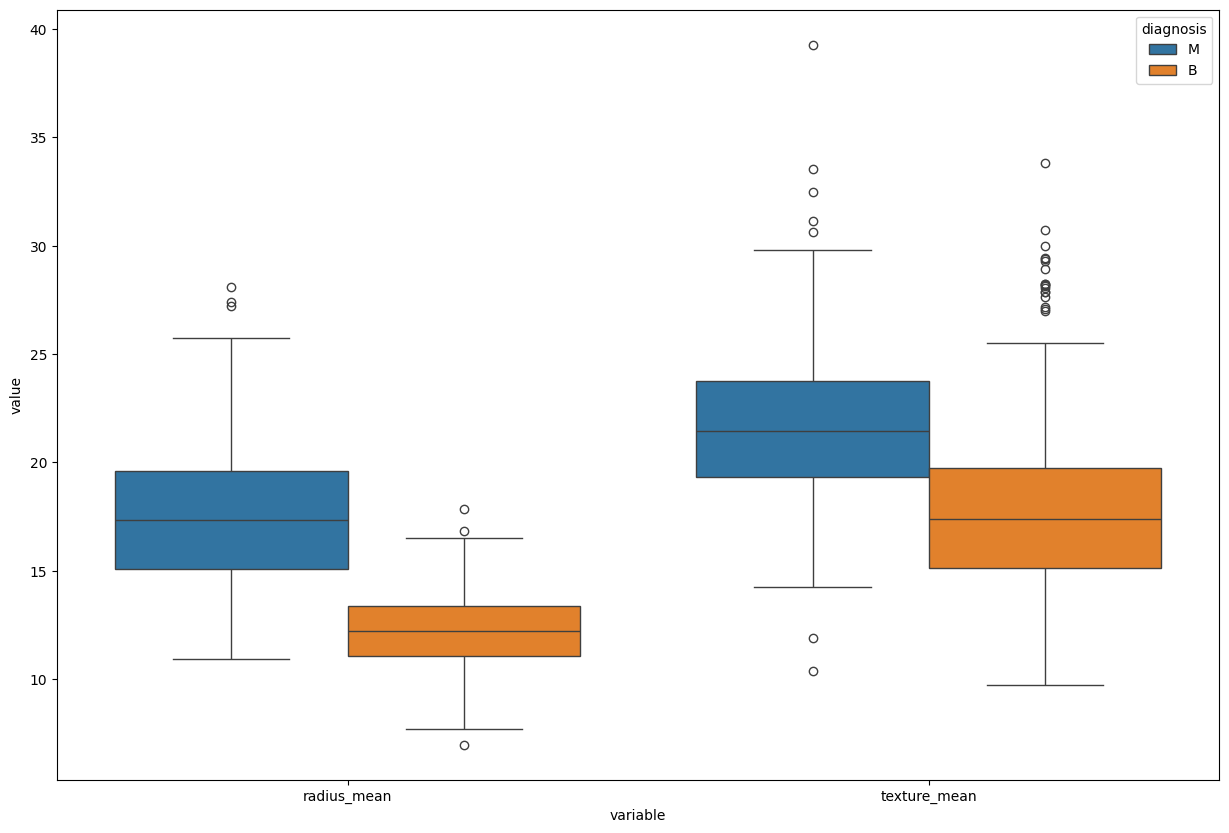

In [11]:
import seaborn as sns

melted_data = data.melt(
    id_vars=["diagnosis"],
    value_vars= ["radius_mean", "texture_mean"]
)
plt.figure(figsize=(15, 10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data = melted_data)
plt.show()

`Summary Statistics`
* Mean 
* Variance: spread of distribution
* Stadard deviation square root of variance
* Lets look at summary statistics of benign tumor radiance mean

In [12]:
print("Mean: ", data_benign.radius_mean.mean())
print("Variance: ", data_benign.radius_mean.var())
print("Standard Deviation: ", data_benign.radius_mean.std())
print("Describe method: ", data_benign.radius_mean.describe())

Mean:  12.146523809523808
Variance:  3.170221722043872
Standard Deviation:  1.7805116461410389
Describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


## CDF 
* Cumulative distribution function is the probability that the variable takes a value less than or equal to x. 
`P(X <= x)` 
* Lets explain in cdf graph of benign radius mean
* in graph, what is `P(12<X)`? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
* You can plot cdd with two different method.

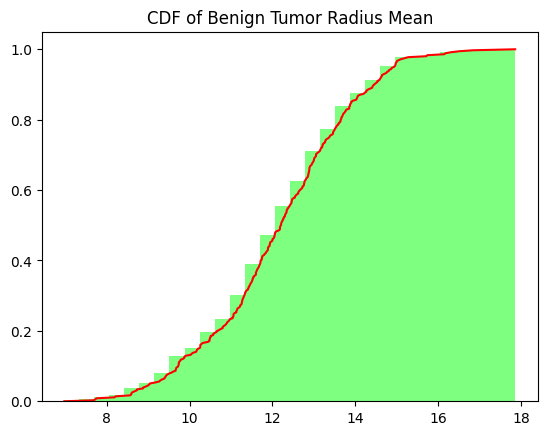

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting CDF of benign tumor radius mean
plt.hist(data_benign.radius_mean, bins=30, fc=(0, 1, 0, 0.5), label='Benign', density=True, cumulative=True)

# Sorting the data to plot the CDF
sorted_data = np.sort(data_benign.radius_mean)
y = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

# Plotting the CDF as a line
plt.plot(sorted_data, y, color='red')

# Adding title and showing the plot
plt.title('CDF of Benign Tumor Radius Mean')
plt.show()


## Effect size
* 